In [1]:
import os
import random
import matplotlib.pyplot as plt
import requests
import wget
from zipfile import ZipFile
from tqdm import tqdm
from PIL import Image

In [2]:
# KODAK DATASET
# Création du dossier de destination
output_dir = 'datasets/Kodak'
os.makedirs(output_dir, exist_ok=True)

# Base URL
base_url = 'https://r0k.us/graphics/kodak/kodak/'

# Ajoute un user-agent pour éviter que le serveur refuse la requête
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'
}

# Téléchargement des 24 images
for i in tqdm(range(1, 25)):
    filename = f'kodim{str(i).zfill(2)}.png'
    url = base_url + filename
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        file_path = os.path.join(output_dir, filename)
        with open(file_path, 'wb') as f:
            f.write(response.content)
        print(f"Téléchargé : {filename}")
    else:
        print(f"Erreur ({response.status_code}) pour {filename}")

print("✅ Téléchargement terminé !")

  0%|          | 0/24 [00:00<?, ?it/s]

  4%|▍         | 1/24 [00:02<00:47,  2.05s/it]

Téléchargé : kodim01.png


  8%|▊         | 2/24 [00:04<00:49,  2.23s/it]

Téléchargé : kodim02.png


 12%|█▎        | 3/24 [00:06<00:42,  2.04s/it]

Téléchargé : kodim03.png


 17%|█▋        | 4/24 [00:08<00:39,  1.96s/it]

Téléchargé : kodim04.png


 21%|██        | 5/24 [00:09<00:34,  1.80s/it]

Téléchargé : kodim05.png


 25%|██▌       | 6/24 [00:10<00:29,  1.65s/it]

Téléchargé : kodim06.png


 29%|██▉       | 7/24 [00:12<00:26,  1.58s/it]

Téléchargé : kodim07.png


 33%|███▎      | 8/24 [00:14<00:28,  1.80s/it]

Téléchargé : kodim08.png


 38%|███▊      | 9/24 [00:16<00:27,  1.84s/it]

Téléchargé : kodim09.png


 42%|████▏     | 10/24 [00:18<00:27,  1.98s/it]

Téléchargé : kodim10.png


 46%|████▌     | 11/24 [00:20<00:23,  1.80s/it]

Téléchargé : kodim11.png


 50%|█████     | 12/24 [00:22<00:21,  1.81s/it]

Téléchargé : kodim12.png


 54%|█████▍    | 13/24 [00:23<00:19,  1.73s/it]

Téléchargé : kodim13.png


 58%|█████▊    | 14/24 [00:25<00:17,  1.78s/it]

Téléchargé : kodim14.png


 62%|██████▎   | 15/24 [00:27<00:16,  1.82s/it]

Téléchargé : kodim15.png


 67%|██████▋   | 16/24 [00:28<00:13,  1.70s/it]

Téléchargé : kodim16.png


 71%|███████   | 17/24 [00:30<00:12,  1.74s/it]

Téléchargé : kodim17.png


 75%|███████▌  | 18/24 [00:32<00:10,  1.82s/it]

Téléchargé : kodim18.png


 79%|███████▉  | 19/24 [00:34<00:09,  1.87s/it]

Téléchargé : kodim19.png


 83%|████████▎ | 20/24 [00:36<00:06,  1.74s/it]

Téléchargé : kodim20.png


 88%|████████▊ | 21/24 [00:38<00:05,  1.80s/it]

Téléchargé : kodim21.png


 92%|█████████▏| 22/24 [00:40<00:03,  1.93s/it]

Téléchargé : kodim22.png


 96%|█████████▌| 23/24 [00:41<00:01,  1.79s/it]

Téléchargé : kodim23.png


100%|██████████| 24/24 [00:44<00:00,  1.83s/it]

Téléchargé : kodim24.png
✅ Téléchargement terminé !


In [3]:
# DIV2K DATASET
# Dossier de destination
output_dir = 'datasets/DIV2K'
os.makedirs(output_dir, exist_ok=True)

# URL du dataset
url = 'http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_LR_bicubic_X2.zip'

# Chemin local du fichier zip
zip_path = os.path.join(output_dir, 'DIV2K_train_LR_bicubic_X2.zip')

# Télécharger le fichier ZIP avec barre de progression
response = requests.get(url, stream=True)
total_size = int(response.headers.get('content-length', 0))
block_size = 1024  # 1 Kibibyte

with open(zip_path, 'wb') as file, tqdm(
    desc='Téléchargement',
    total=total_size,
    unit='iB',
    unit_scale=True,
    unit_divisor=1024,
) as bar:
    for data in response.iter_content(block_size):
        file.write(data)
        bar.update(len(data))

print("✅ Téléchargement terminé !")

# Extraire le zip
print("🔧 Extraction en cours...")
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

print(f"✅ Extraction terminée ! Les fichiers sont dans {output_dir}")

# Supprimer le fichier zip après extraction
os.remove(zip_path)
print("🗑️  Fichier zip supprimé après extraction.")

Téléchargement: 100%|██████████| 883M/883M [00:28<00:00, 32.0MiB/s] 


✅ Téléchargement terminé !
🔧 Extraction en cours...
✅ Extraction terminée ! Les fichiers sont dans datasets/DIV2K
🗑️  Fichier zip supprimé après extraction.


In [4]:
# Urban100 DATASET
from datasets import load_dataset
import os
from tqdm import tqdm

# Charger Urban100
dataset = load_dataset("eugenesiow/urban100")

# Créer le dossier de destination
output_dir = "datasets/Urban100"
os.makedirs(output_dir, exist_ok=True)

# Sauvegarder chaque image (clé 'png')
print(f"Saving {len(dataset['train'])} images to '{output_dir}'")

for idx, example in tqdm(enumerate(dataset['train']), total=len(dataset['train'])):
    image = example['png']  # PIL.Image
    filename = f"urban_{idx+1:03d}.png"
    path = os.path.join(output_dir, filename)
    
    # Sauvegarde en PNG
    image.save(path)

print("✅ Urban100 dataset saved!")

Saving 400 images to 'datasets/Urban100'


100%|██████████| 400/400 [00:19<00:00, 20.89it/s] 

✅ Urban100 dataset saved!


In [10]:
# McM DATASET

# 1. Créer le dossier dataset/McM
output_dir = "datasets/McM"
os.makedirs(output_dir, exist_ok=True)

# 2. Télécharger le zip
zip_url = "https://www4.comp.polyu.edu.hk/~cslzhang/DATA/McM.zip"
zip_path = os.path.join(output_dir, "McM.zip")

if not os.path.exists(zip_path):
    print("⬇️ Downloading McM dataset...")
    wget.download(zip_url, zip_path)
    print(f"\n✅ Downloaded to {zip_path}")
else:
    print(f"✅ Zip already exists at {zip_path}")

# 3. Extraire avec le mot de passe
password = b"McM_CDM"  # ⚠️ le mot de passe doit être en bytes

print("📦 Extracting McM dataset...")
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir, pwd=password)

print(f"✅ Dataset extracted to {output_dir}")

# 4. Supprimer le zip après extraction
os.remove(zip_path)

⬇️ Downloading McM dataset...

✅ Downloaded to datasets/McM/McM.zip
📦 Extracting McM dataset...
✅ Dataset extracted to datasets/McM


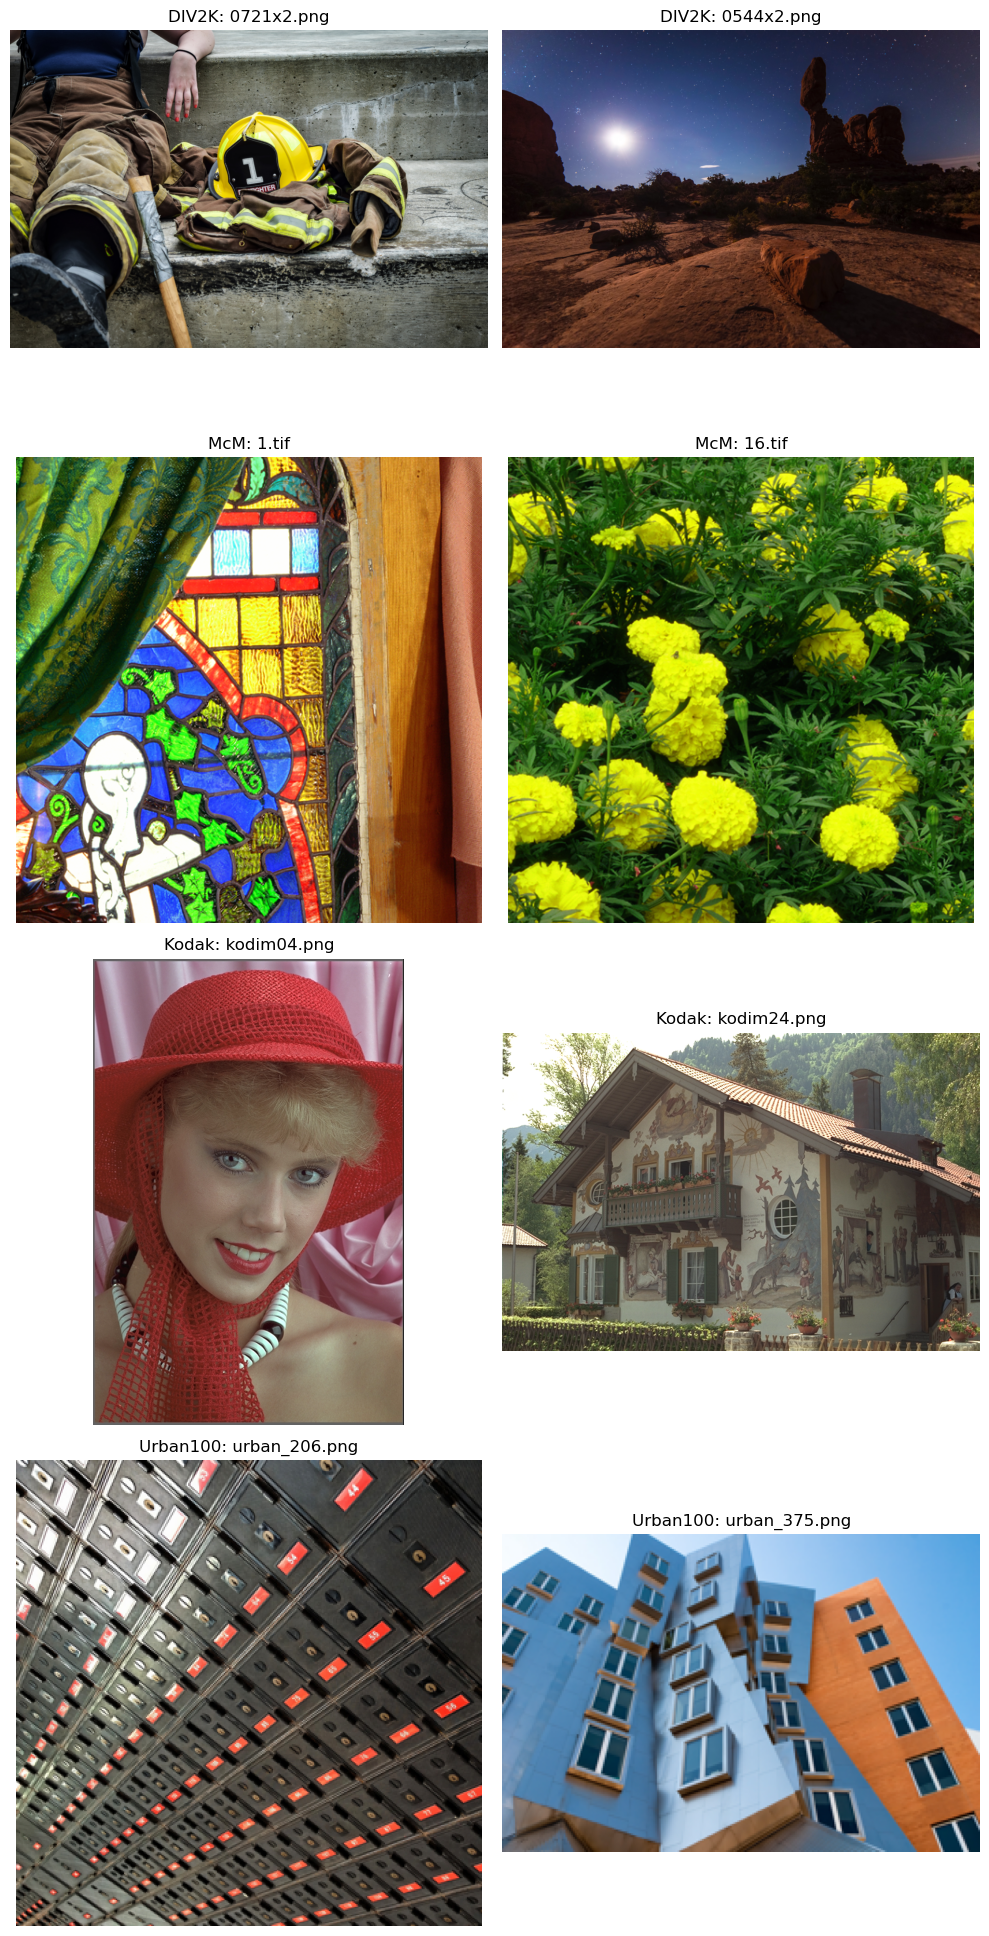

In [21]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Dictionnaire des chemins corrects
dataset_paths = {
    "DIV2K": "datasets/DIV2K/DIV2K_train_LR_bicubic/X2",
    "McM": "datasets/McM/McM",
    "Kodak": "datasets/Kodak",
    "Urban100": "datasets/Urban100",
}

# Charger les listes de fichiers
datasets = {
    name: os.listdir(path)
    for name, path in dataset_paths.items()
}

# Afficher les images
fig, axs = plt.subplots(4, 2, figsize=(10, 20))

for i, (dataset_name, filenames) in enumerate(datasets.items()):
    path = dataset_paths[dataset_name]  # Chemin correct
    for j in range(2):
        filename = random.choice(filenames)
        img_path = os.path.join(path, filename)
        img = Image.open(img_path)
        axs[i, j].imshow(img)
        axs[i, j].axis("off")
        axs[i, j].set_title(f"{dataset_name}: {filename}")

plt.tight_layout()
plt.show()